sklearn offers one more scaler minmax scaler which helps us to scale datapoints into same range
in movie data rating and metascore has differnt scale.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_data=pd.read_csv('C:\\Users\\win8\\Desktop\\DataScienceRunningNotes\\DSFromLearningHub\\Dataset\\IMDB-Movie-Data.csv',sep=",")
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#before doing scaler first visuvalize the current distrbution of the data for that we are going to use
#matplotlib

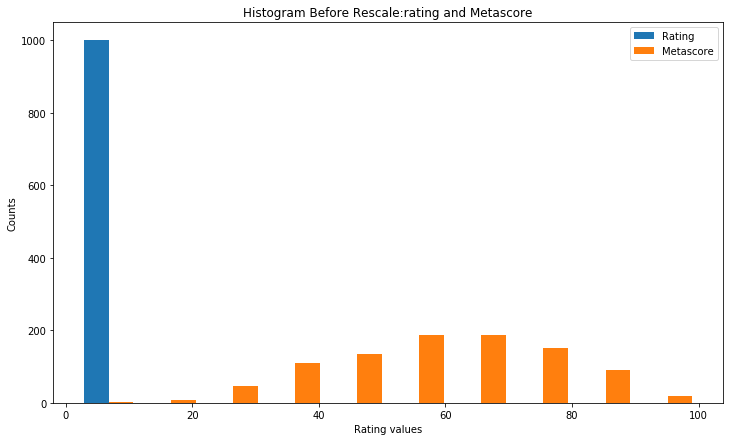

In [3]:
plt.figure(figsize=(12,7))
plt.hist([movie_data.Rating,movie_data.Metascore]
         ,bins=10,
         label=("Rating","Metascore"))
plt.title("Histogram Before Rescale:rating and Metascore")
plt.legend(loc='best')
plt.xlabel('Rating values')
plt.ylabel('Counts')
plt.show()

In [4]:
scaler=MinMaxScaler(feature_range=(0,5))

In [5]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 5))

In [6]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 5))>

In [7]:
scaled_rating=scaler.fit_transform(movie_data[['Rating','Metascore']])
#we can fit the  model and transform like above(binarizer) it has a two steps process we
#can do it in one step with fit_transform

In [8]:
np.set_printoptions(precision=3) #to set precision of data ex; 3.652
print(scaled_rating[0:5,:])

[[4.366 3.652]
 [3.592 3.034]
 [3.803 2.865]
 [3.732 2.697]
 [3.028 1.629]]


In [9]:
rating_df=pd.DataFrame(data=scaled_rating,columns=['ScaledRating','ScaledMetascore'])
rating_df.head()

,ScaledRating,ScaledMetascore
0,4.366197,3.651685
1,3.591549,3.033708
2,3.802817,2.865169
3,3.732394,2.696629
4,3.028169,1.629213


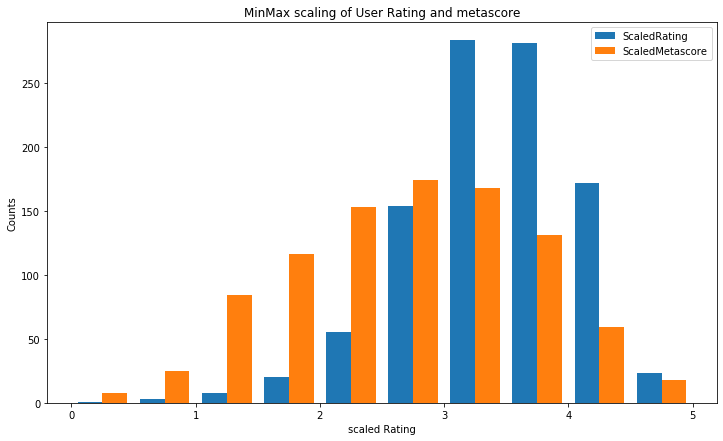

In [10]:
plt.figure(figsize=(12,7))
plt.hist([rating_df.ScaledRating,rating_df.ScaledMetascore]
         ,bins=10,
         label=("ScaledRating","ScaledMetascore"))
plt.title("MinMax scaling of User Rating and metascore")
plt.legend(loc='best')
plt.xlabel('scaled Rating')
plt.ylabel('Counts')
plt.show()

In [11]:
#After applying the mixmax scaler data points at same scale